In [1]:
!pip install ucimlrepo
!pip install bayesian-optimization

     ---------------------------------------- 12.9/12.9 MB 7.6 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 1.24.1
    Uninstalling numpy-1.24.1:
      Successfully uninstalled numpy-1.24.1


ERROR: Could not install packages due to an OSError: [WinError 5] Access is denied: 'C:\\Users\\varsh\\AppData\\Local\\Temp\\pip-uninstall-o3bzmxzy\\libopenblas64__v0.3.21-gcc_10_3_0.dll'
Consider using the `--user` option or check the permissions.



In [102]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt

In [83]:
# Load the dataset
file_path = r"C:\Users\varsh\Downloads\predict+students+dropout+and+academic+success\data.csv"
df = pd.read_csv(file_path, sep=';')
print(df.head())

# Preprocessing the dataset
# Handling missing values (if any)
df.isnull().sum()

# Encode categorical variables using one-hot encoding
df_encoded = pd.get_dummies(df)

# Split the dataset into features (X) and target (y)
X = df_encoded.drop('Target_Dropout', axis=1)
y = df_encoded['Target_Dropout']  


   Marital status  Application mode  Application order  Course  \
0               1                17                  5     171   
1               1                15                  1    9254   
2               1                 1                  5    9070   
3               1                17                  2    9773   
4               2                39                  1    8014   

   Daytime/evening attendance\t  Previous qualification  \
0                             1                       1   
1                             1                       1   
2                             1                       1   
3                             1                       1   
4                             0                       1   

   Previous qualification (grade)  Nacionality  Mother's qualification  \
0                           122.0            1                      19   
1                           160.0            1                       1   
2                         

In [85]:
X_train, X_test, y_train, y_test = train_test_split(X, y.to_numpy().ravel(), test_size=0.3, random_state=42)

In [87]:
# kernels = ['linear', 'poly', 'sigmoid', 'rbf', 'anovadot']
kernels=['rbf', 'poly', 'linear']
pbounds = {'kernel': (0, len(kernels)-1),
           'nu': (0.01, 0.1),
           'tol': (1e-6, 1.0)}
     

In [89]:
def evaluate_svm(kernel, nu, tol):
  kernel_name = kernels[int(kernel)]
  model = NuSVC(kernel=kernel_name, nu=nu, tol=tol)
  model.fit(X_train, y_train)
  y_pred = model.predict(X_test)
  accuracy = accuracy_score(y_test, y_pred)
  return accuracy

In [91]:
results = []
optimizers = []
targets = []  # Store target values (accuracy scores)
iteration_counts = []  # Store iteration counts

for sample in range(10):
    optimizer = BayesianOptimization(evaluate_svm, pbounds)
    optimizer.maximize(init_points=5, n_iter=100)
    best_params = optimizer.max['params']
    best_accuracy = optimizer.max['target']
    results.append((sample, best_accuracy, best_params))
    optimizers.append(optimizer)

    # Store target values and iteration counts
    targets.append(optimizer._space.target)
    iteration_counts.append(optimizer._space.params.shape[0])

|   iter    |  target   |  kernel   |    nu     |    tol    |
-------------------------------------------------------------
| 1         | 0.4465    | 1.226     | 0.02227   | 0.09938   |
| 2         | 0.5158    | 0.3548    | 0.04836   | 0.9631    |
| 3         | 0.5685    | 1.49      | 0.06003   | 0.6483    |
| 4         | 0.6325    | 1.666     | 0.01864   | 0.9489    |
| 5         | 0.6468    | 0.8849    | 0.02204   | 0.4372    |
| 6         | 0.5113    | 0.1656    | 0.0753    | 0.281     |
| 7         | 0.6258    | 0.8942    | 0.03905   | 0.4629    |
| 8         | 0.6182    | 1.77      | 0.0959    | 0.7983    |
| 9         | 0.6468    | 0.8805    | 0.0801    | 0.3942    |
| 10        | 0.5105    | 0.2345    | 0.01602   | 0.6891    |
| 11        | 0.6619    | 0.6978    | 0.01485   | 0.2983    |
| 12        | 0.6205    | 1.991     | 0.02925   | 0.9836    |
| 13        | 0.5956    | 0.6909    | 0.01069   | 0.01671   |
| 14        | 0.6468    | 0.1905    | 0.02261   | 0.6083    |
| 15    

In [93]:
table = pd.DataFrame(results, columns=['Sample', 'Best Accuracy', 'Best SVM Parameter'])
print(table)

   Sample  Best Accuracy                                 Best SVM Parameter
0       0       0.708584  {'kernel': 1.2125941906738509, 'nu': 0.0447757...
1       1       0.703313  {'kernel': 1.9681784038841044, 'nu': 0.0539112...
2       2       0.713102  {'kernel': 1.533915583128347, 'nu': 0.04631165...
3       3       0.685994  {'kernel': 1.387724350404763, 'nu': 0.06990335...
4       4       0.706325  {'kernel': 1.8388261406972115, 'nu': 0.0924568...
5       5       0.714608  {'kernel': 1.1757340624882961, 'nu': 0.0464128...
6       6       0.707078  {'kernel': 1.5146657314933245, 'nu': 0.0591037...
7       7       0.708584  {'kernel': 1.1076146859545086, 'nu': 0.0448831...
8       8       0.702560  {'kernel': 1.1917019134593583, 'nu': 0.0540012...
9       9       0.708584  {'kernel': 1.4542555305931342, 'nu': 0.0449304...


In [95]:
max_accuracy_sample = table.loc[table['Best Accuracy'].idxmax()]
print(f"Sample with maximum accuracy: {max_accuracy_sample['Sample']}")

Sample with maximum accuracy: 5


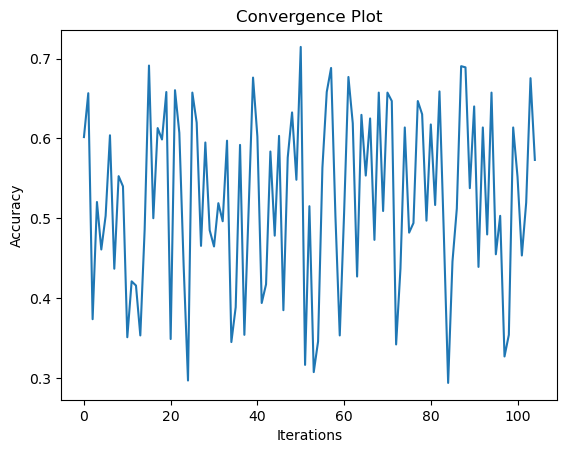

In [97]:
max_accuracy_optimizer_idx = max_accuracy_sample['Sample']
iterations = range(iteration_counts[max_accuracy_optimizer_idx])
plt.plot(iterations, targets[max_accuracy_optimizer_idx][:iteration_counts[max_accuracy_optimizer_idx]])
plt.xlabel('Iterations')
plt.ylabel('Accuracy')
plt.title('Convergence Plot')
plt.show()